# How to Use RouteFinder1.0

Note: This notebook requires a local download of the 2010 census file for Texas (tabblock2010_48_pophu.shp) which can be downloaded [here](https://catalog.data.gov/dataset/tiger-line-shapefile-2010-2010-state-texas-2010-census-block-state-based-shapefile-with-housing/resource/2547c642-c0df-4128-8ade-0fd75c01c54d)

Unzip the file and note the path to `gz_2010_48_160_00_500k.shp`

### 1. Aquire and Clean Data for the Class

* Import `define_city_geo` function
* Point to state level census boundary shapefile
* Run `define_city_geo()` function to get `city_shape` and `city_df`

#### Define City Geometry

In [1]:
from get_data import define_city_geo

tx_state_boundary_path = 'data/boundary/gz_2010_48_160_00_500k.shp'
name_of_city = 'Austin'
city_shape , city_df = define_city_geo(tx_state_boundary_path, name_of_city)

* Import `make_tract_geos()` function
* Point to state level census tracts shapefile
* Define county code in string format
* Run `get_tract_geos()` function to get `tracts_df`

#### Make Census Tract DataFrame

In [2]:
from get_data import make_tract_geos

tracts_path = 'data/tracts/gz_2010_48_140_00_500k.shp'
county_code = '453'
tracts_df = make_tract_geos(tracts_path, county_code, city_shape)

* Import `local_roads()` function
* Point to county level census roads shapefile
* Run `local_roads()` function to get `streets_df` and `secondary_df`

#### Get Local Roads DataFrame

In [3]:
from get_data import local_roads

county_roads_path = 'data/roads/tl_2017_48453_roads.shp'
streets_df , secondary_df = local_roads(county_roads_path, city_shape)

* Import and run `clean_census_data()` function
* Point to file of state level census block shapefile data

#### Get Census Block Data

In [23]:
from get_data import clean_census_data

census_block_path = '../schmidtbit/capstone/population/tabblock2010_48_pophu.shp'
austin_centroids, austin_blocks = clean_census_data(census_block_path, '453', city_shape)

`census_block_path` should be altered to point to your local version

### 2. Make Population Clusters (Bus Stops)

Note: You can pass in any shapefile GeoDataFrame in `EPSG:4326` coordinates as the `centroids_geo_df` parameter

* Import `MakeClusters` class and initialize with `austin_centroids` and `streets_df`
* Fit the class with number of proposed bus stops 

#### Run Clustring Algorithm -  [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [24]:
from MakeCluster import MakeClusters

my_clusters = MakeClusters(austin_centroids, streets_df)
k_stops = 2542
my_clusters.fit(k_stops)
my_clusters.snap()

__view clustering model parameters__

In [25]:
my_clusters.model.get_params

<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2542, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>

__View sum of squared distances of each point to cluster center__

In [26]:
my_clusters.model.inertia_

0.015058863442806936

### 3. Import Class & Define Evaluation Area

* Import `RouteFinder` and initialize class
* Define evaluation area with a list of census tract numbers in string format
* Specify a name for the region
* Run the `evaluation_area` function on the class

In [27]:
from RouteFinder import RouteFinder

model = RouteFinder()
tracts = ['001000','000902','000901','000804','000801','000802','000803','002109','002110','002111']
name_of_region ='East Austin'
stops_df = my_clusters.clusters_df
model.evaluation_area(tracts, name_of_region, tracts_df, stops_df, county_roads_path)

* Define the transfer station location for the region
* Define two end points for the routes
* Define the number of random selections

In [29]:
from shapely.geometry import Point

transfer_station = Point(-97.731515, 30.271101)
terminus_1 = Point(-97.6652821958003, 30.261448286958167)
terminus_2 = Point(-97.67028301000808, 30.271179378332818) 
random_selections = 50000
evolutions = 100000

__Fit the Model (Random Selection Function)__

In [30]:
model.fit(transfer_station, terminus_1, terminus_2, random_selections)

__View Scores and Routes__

In [31]:
model.score()

number of total stops = 151

Route Option 1: 
score = 3.3347921230569577

Route Option 2: 
score = 3.3354960859302754

Route Option 3: 
score = 3.340312425123788

Route Option 4: 
score = 3.3684662388445936



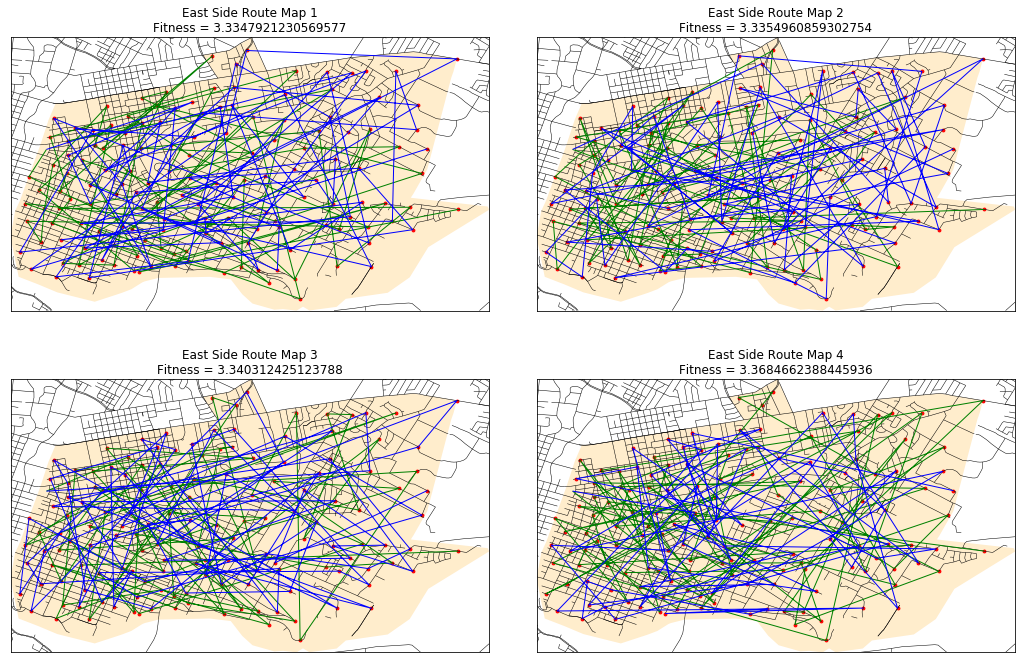

In [32]:
model.plot()

__Evolve the Model__

In [33]:
model.evolve(evolutions)

In [34]:
model.score()

number of total stops = 151

Route Option 1: 
score = 1.6032592764164897

Route Option 2: 
score = 1.7224829127804941

Route Option 3: 
score = 1.7659306693573162

Route Option 4: 
score = 1.7913666663626597



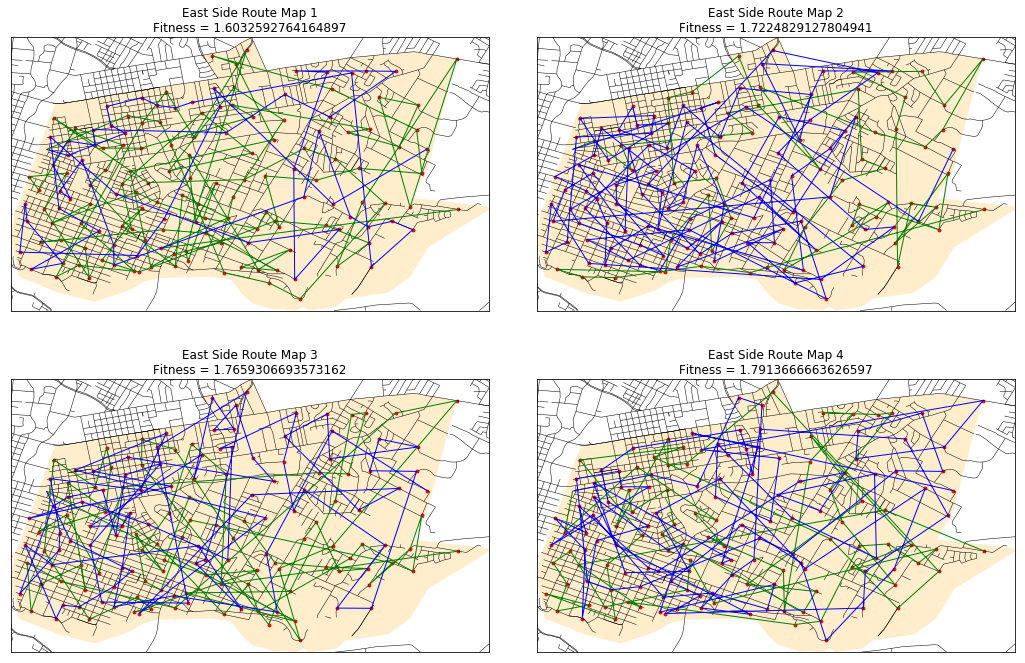

In [35]:
model.plot()